In [49]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import soundfile as sf
import librosa
import librosa.display
import pandas as pd
from scipy.signal import find_peaks
from pydub import AudioSegment
import os

SAMPLE_RATE = 44100


In [50]:
file_path = 'sample1.wav'

audio, sr = librosa.load(file_path, sr=SAMPLE_RATE, mono=True)


/var/folders/f8/g9fbmmyn3757__nzcw0m__dm0000gn/T/ipykernel_95688/546949111.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=SAMPLE_RATE, mono=True)


In [51]:
dt = 1 / sr
t = np.arange(0, len(audio) * dt, dt) 


n = len(audio) 
fhat = np.fft.fft(audio, n)
PSD = (fhat * np.conj(fhat)) / n  
freq = (1 / (dt * n)) * np.arange(n)

L = np.arange(1, np.floor(n / 2), dtype='int')

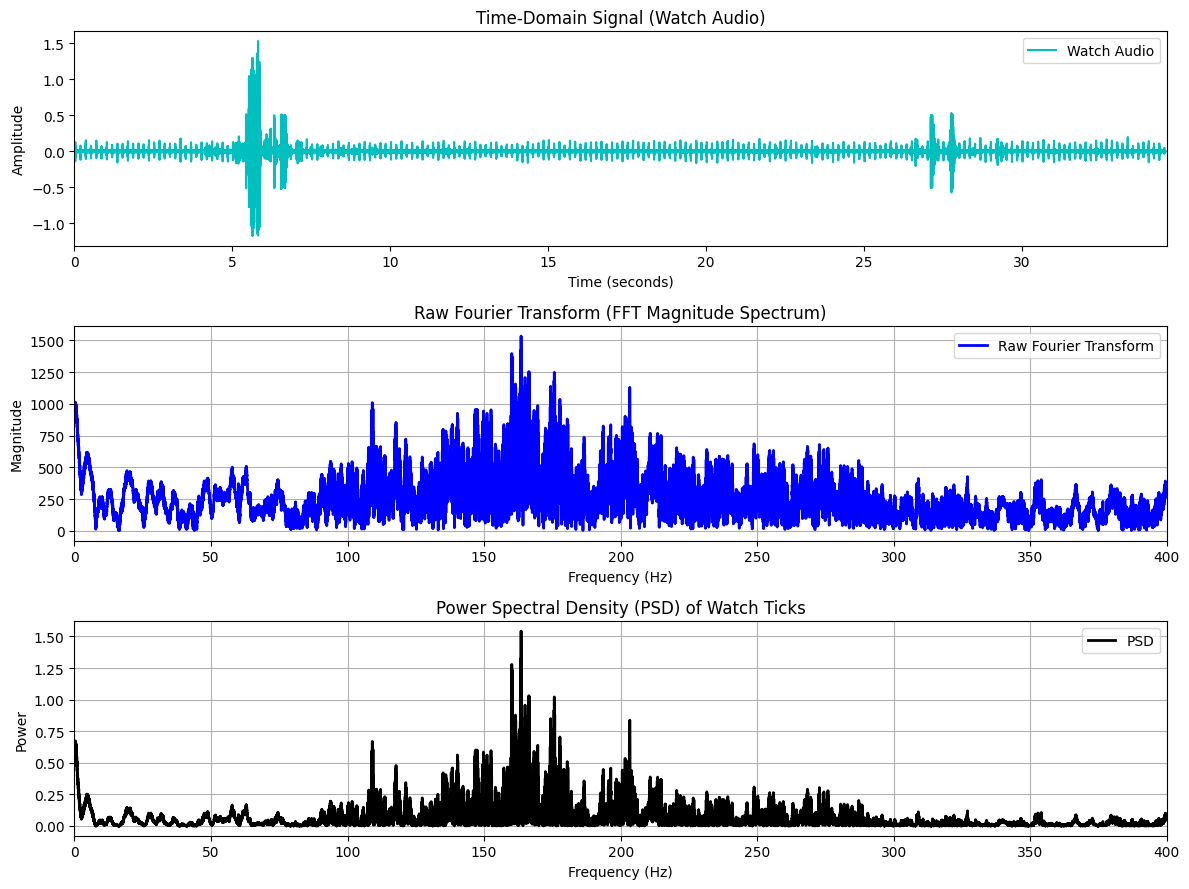

In [52]:
fig, axs = plt.subplots(3, 1, figsize=(12, 9))


plt.sca(axs[0])
plt.plot(t, audio, color='c', linewidth=1.5, label='Watch Audio')
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Time-Domain Signal (Watch Audio)")
plt.xlim(t[0], t[-1])
plt.legend()

# Plot raw Fourier Transform (FFT Magnitude Spectrum)
plt.sca(axs[1])
plt.plot(freq[L], np.abs(fhat[L]), color='b', linewidth=2, label='Raw Fourier Transform')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Raw Fourier Transform (FFT Magnitude Spectrum)")
plt.xlim(0, 400) 
plt.grid()
plt.legend()

# Plot Power Spectral Density (PSD)
plt.sca(axs[2])
plt.plot(freq[L], PSD[L], color='k', linewidth=2, label='PSD')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.title("Power Spectral Density (PSD) of Watch Ticks")
plt.xlim(0, 400) 
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


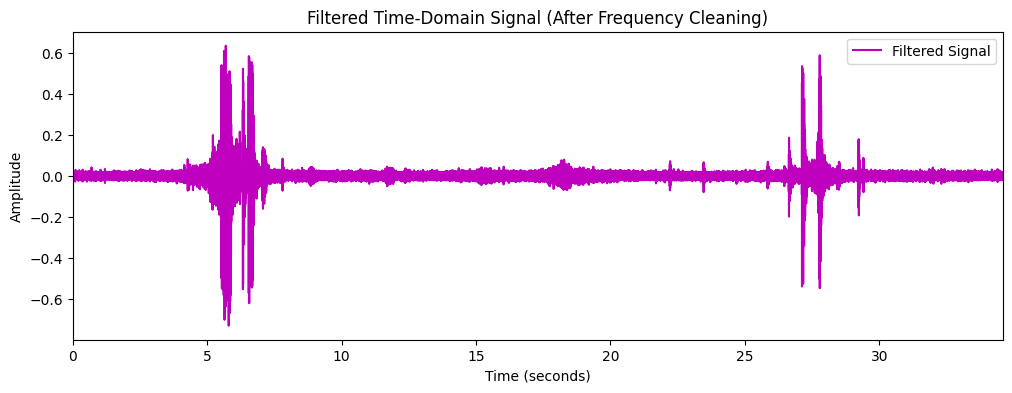

In [53]:
indices = PSD > 0.015

PSDclean = PSD * indices
fhat = indices * fhat

ffilt = np.fft.ifft(fhat)

plt.figure(figsize=(12, 4))
plt.plot(t, np.real(ffilt), color='m', linewidth=1.5, label='Filtered Signal')
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Filtered Time-Domain Signal (After Frequency Cleaning)")
plt.xlim(t[0], t[-1])
plt.legend()
plt.show()
